In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
time_series = r"C:\Users\Admin\Desktop\Hanine\Portfolio\freecodecamp\fcc-forum-pageviews.csv"
df = pd.read_csv(time_series, parse_dates=['date'], index_col='date')


print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [4]:
# 1. Calculate the lower and upper quantile thresholds

lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

# 2. Filter the DataFrame to keep only data *within* the bounds

filtered_df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Display results
print(filtered_df.head())

          date  value
10  2016-05-19  19736
17  2016-05-26  18060
18  2016-05-27  19997
19  2016-05-28  19044
20  2016-05-29  20325


In [31]:
def draw_line_plot():
    
# Use the explicit Matplotlib API (fig, ax) for better control
    fig, ax = plt.subplots(figsize=(15, 7))

# Pandas plotting uses the index as the x-axis by default
    ax.plot(filtered_df.index, filtered_df['value'], color='red', linewidth=1) 
    
     # Set the title
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    
    # Set the x and y axis labels
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")


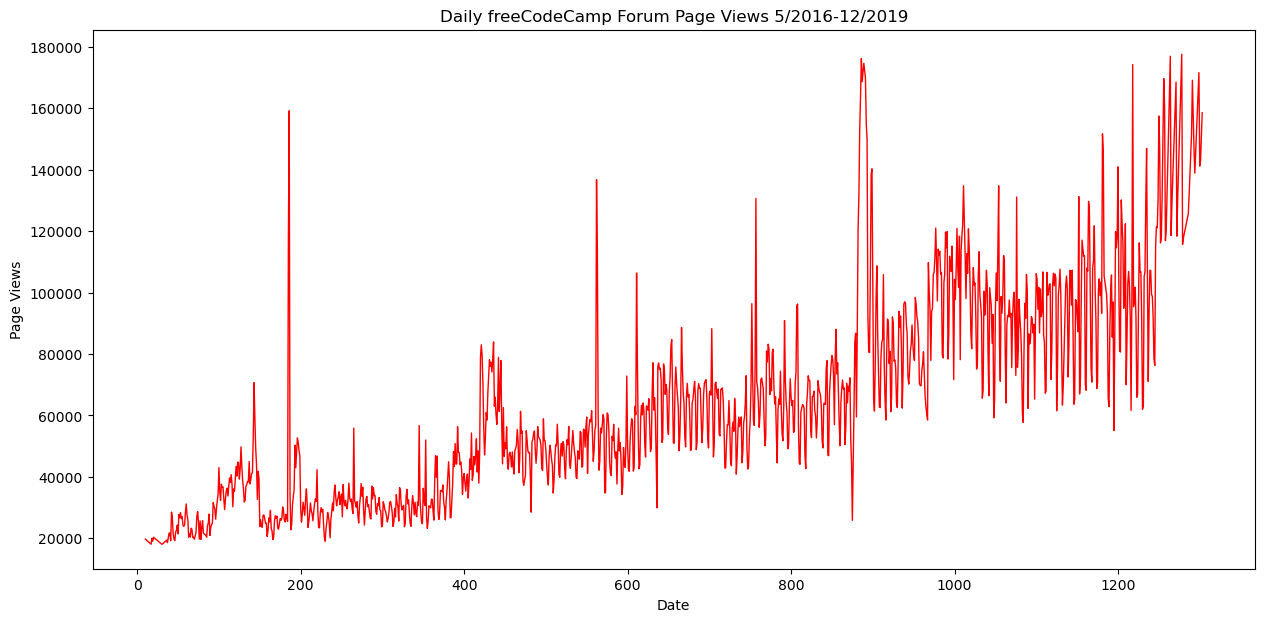

In [32]:
draw_line_plot()

In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [35]:
df['year'] = df.index.year
df['month'] = df.index.month

In [36]:
df.head()

,value,year,month
date,,,
2016-05-09,1201,2016,5
2016-05-10,2329,2016,5
2016-05-11,1716,2016,5
2016-05-12,10539,2016,5
2016-05-13,6933,2016,5


In [40]:
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()

print(df_bar)

month             1              2             3             4             5   \
year                                                                            
2016             NaN            NaN           NaN           NaN  11242.695652   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month             6              7              8             9   \
year                                                               
2016    19124.366667   23314.225806   31049.193548  41476.866667   
2017    43577.500000   65806.838710   47712.451613  47376.800000   
2018    70117.000000   63591.064516   62831.612903  65941.733333   
2019   162402.600000  100804.451613  117991.032258  97268.833333   

month             10             11             12  
year                                               

In [41]:
def draw_bar_plot():
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    
    fig, ax = plt.subplots(figsize=(12,6))
    df_bar.plot(kind='bar', ax=ax)
    
    ax.set_xlabel('Years')
    ax.set_ylabel('Average page views')
    ax.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.xticks(rotation=90)
    
    return fig

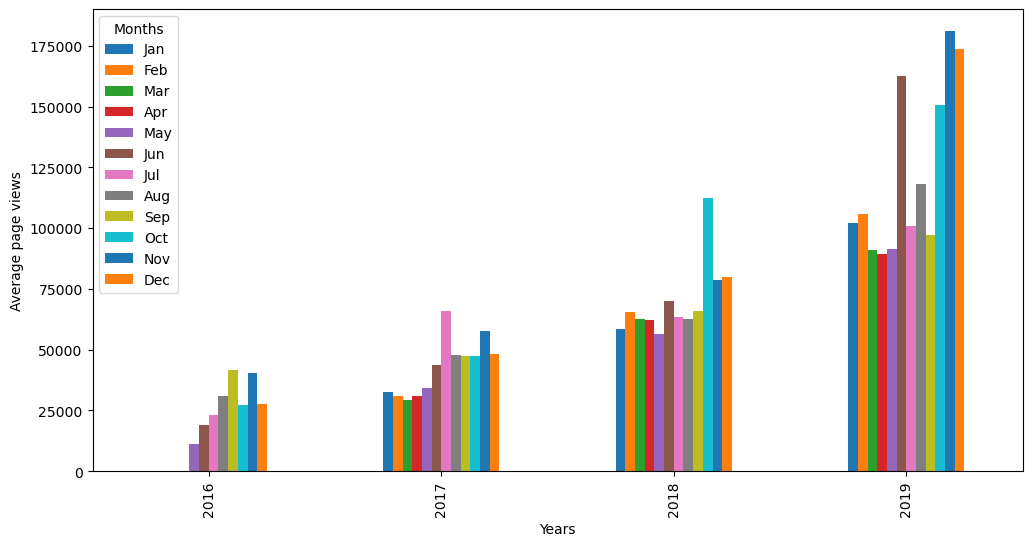

In [42]:
draw_bar_plot()
plt.show()

In [43]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Year-wise box plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    # Month-wise box plot (Seasonality)
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
    return fig
    
    
    

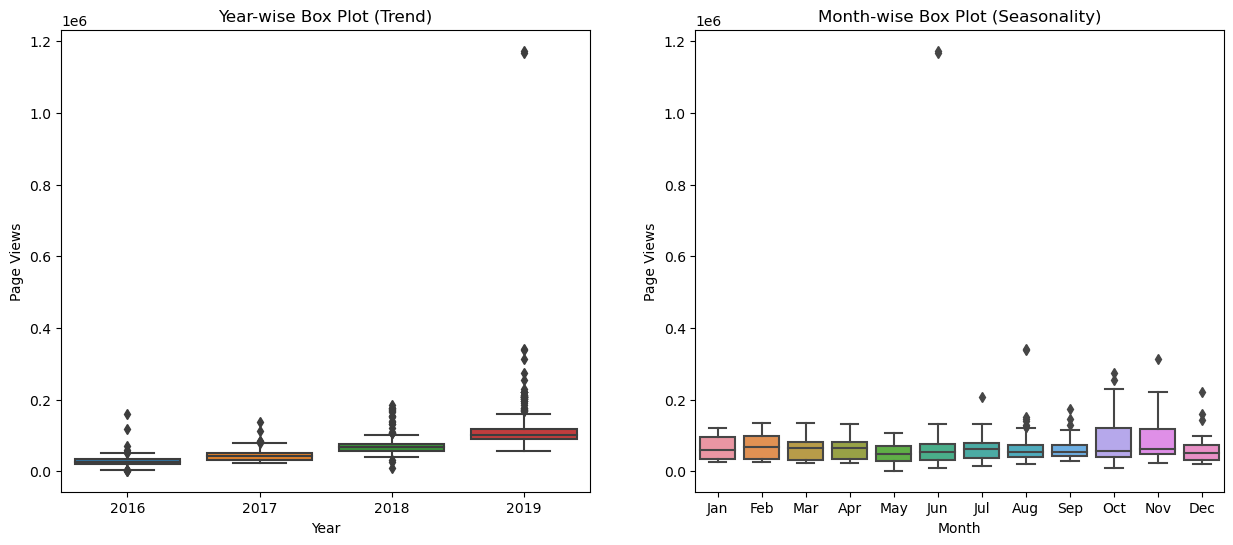

In [45]:
draw_box_plot()
plt.show()